<a href="https://colab.research.google.com/github/SoSavage321/MachineLearningLab4/blob/main/MachineLearningLab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Section 1: Handling Missing Data**

**Exercise 1.1: Identifying Missing Values**

In [1]:
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
print(df)
print(df.isnull().sum())


      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN
A    0
B    0
C    1
D    1
dtype: int64


Task

In [2]:
import pandas as pd
import numpy as np
from io import StringIO

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))

# Introduce missing values in different places
df.loc[0, 'C'] = np.nan   # make C in row 0 missing
df.loc[2, 'A'] = np.nan   # make A in row 2 missing
df.loc[1, 'B'] = np.nan   # make B in row 1 missing

print(df)
print(df.isnull().sum())


     A     B     C    D
0  1.0   2.0   NaN  4.0
1  5.0   NaN   NaN  8.0
2  NaN  11.0  12.0  NaN
A    1
B    1
C    2
D    1
dtype: int64


**Exercise 1.2: Eliminating Missing Values**

In [3]:
# Drop rows with any missing values
print(df.dropna(axis=0))

# Drop columns with any missing values
print(df.dropna(axis=1))

# Drop rows where all values are missing (none in this case)
print(df.dropna(how='all'))

# Drop rows with fewer than 4 non-missing values
print(df.dropna(thresh=4))

# Drop rows where 'C' is missing
print(df.dropna(subset=['C']))

Empty DataFrame
Columns: [A, B, C, D]
Index: []
Empty DataFrame
Columns: []
Index: [0, 1, 2]
     A     B     C    D
0  1.0   2.0   NaN  4.0
1  5.0   NaN   NaN  8.0
2  NaN  11.0  12.0  NaN
Empty DataFrame
Columns: [A, B, C, D]
Index: []
    A     B     C   D
2 NaN  11.0  12.0 NaN


Task

1. Remove rows with missing values: print(df.dropna(axis=0)).    # Default: remove any row with at least one NaN.



 Use it when:

 If only a few rows have missing data, it's safe to drop them.

 For example, if two out of 10,000 rows have missing values, simply drop them.

  2. Remove columns with missing values: print(df.dropna(axis=1)).    # remove any column containing at least one NaN.


 Use it when:

 You have several features/columns, but just a few are "bad" due to a large number of missing values.

 For instance, if a column is 50% empty and cannot be populated, it is wiser to remove it completely.

  3. Remove rows with missing values: print(df.dropna(how='all')).


 Useful when the dataset has "blank rows" (for example, when importing untidy CSVs).

 4. Remove rows with fewer than a threshold of non-missing values: print(df.dropna(thresh=4)).



 For example, if a row is basically empty yet has only one value, it is unlikely to be valuable.

 Rows are saved only if they have at least four valid (non-NaN) entries.

  5. Use df.dropna to remove rows where a specific column is missing.


 Use when: A certain column is crucial (such as "Age" in a medical dataset).


When should I choose which?

 Drop rows when you have enough data and can afford to lose some records.


 Drop columns when a feature is largely absent or unimportant for your model.

 When a dataset is small and losing rows/columns is not an option, consider imputation instead of discarding.

**Exercise 1.3: Imputing Missing Values**

In [4]:
from sklearn.impute import SimpleImputer
import numpy as np

# Mean strategy
imr_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_mean = imr_mean.fit_transform(df.values)
print("Mean Imputation:\n", imputed_mean)

# Median strategy
imr_median = SimpleImputer(missing_values=np.nan, strategy='median')
imputed_median = imr_median.fit_transform(df.values)
print("\nMedian Imputation:\n", imputed_median)

# Most frequent strategy
imr_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputed_freq = imr_freq.fit_transform(df.values)
print("\nMost Frequent Imputation:\n", imputed_freq)


Mean Imputation:
 [[ 1.   2.  12.   4. ]
 [ 5.   6.5 12.   8. ]
 [ 3.  11.  12.   6. ]]

Median Imputation:
 [[ 1.   2.  12.   4. ]
 [ 5.   6.5 12.   8. ]
 [ 3.  11.  12.   6. ]]

Most Frequent Imputation:
 [[ 1.  2. 12.  4.]
 [ 5.  2. 12.  8.]
 [ 1. 11. 12.  4.]]


Task

Comparison strategies

 Mean (default for numerical values).


 Each missing value is replaced by the column's average.

 Smoothes the data, however outliers might cause distortions.

 Median

 Each missing value is replaced with the column's median.

 Stronger tolerance for outliers is beneficial when dealing with skewed data.

 Most frequent

 Each missing value is replaced by the most common value in the column.

 For categorical data (e.g. "red", "blue", "green"), mean/median do not make sense, hence "most_frequent" is best.



 Why is'most_frequent' relevant in categorical data?

 Categorical values do not have a "mean" or "median."  Example:

 Colors are ["red", "blue", NaN, "blue", "green"]


 Mean/median will not work here.

 With strategy="most_frequent", the missing value will be "blue" (since it occurs most frequently).

 This keeps the mode of the data, making it more realistic.

# **Section 2: Handling Categorical Data**

In [5]:
import pandas as pd

# Original DataFrame
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2'],
    ['yellow', 'S', 8.7, 'class1']   # added a new row with size 'S'
])
df.columns = ['color', 'size', 'price', 'classlabel']

# Updated size mapping (ordinal)
size_mapping = {'S': 0, 'M': 1, 'L': 2, 'XL': 3}
df['size'] = df['size'].map(size_mapping)

print("DataFrame with Ordinal Mapping:")
print(df)

# Inverse mapping
inv_size_mapping = {v: k for k, v in size_mapping.items()}
print("\nInverse Mapping (Back to original sizes):")
print(df['size'].map(inv_size_mapping))


DataFrame with Ordinal Mapping:
    color  size  price classlabel
0   green     1   10.1     class2
1     red     2   13.5     class1
2    blue     3   15.3     class2
3  yellow     0    8.7     class1

Inverse Mapping (Back to original sizes):
0     M
1     L
2    XL
3     S
Name: size, dtype: object


**Exercise 2.2: Encoding Class Labels**

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Encode class labels
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
print("Encoded labels:", y)

# Inverse transform
print("Decoded labels:", class_le.inverse_transform(y))

# Test classifier with encoded labels
X = df[['size', 'price']].values   # features
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)
print("\nPrediction with encoded labels:", clf.predict([[2, 14]]))


Encoded labels: [1 0 1 0]
Decoded labels: ['class2' 'class1' 'class2' 'class1']

Prediction with encoded labels: [0]


Task

Why are labels encoded as integers?

 Machine learning models (such as scikit-learn classifiers) often work with numeric values only.


 Many algorithms may give an error if you pass strings ("class1", "class2") instead of integers/floats.

 Encoding converts labels into numbers (class1 → 0, class2 → 1), allowing classifiers to interpret them.

# **Exercise 2.3: One-Hot Encoding for Nominal Features**

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assuming df is your DataFrame with columns: color, size, price
# First, let's create a sample DataFrame for demonstration
data = {
    'color': ['red', 'blue', 'green', 'red', 'blue'],
    'size': ['S', 'M', 'L', 'M', 'S'],
    'price': [10, 15, 20, 12, 18]
}
df = pd.DataFrame(data)

# Apply one-hot encoding to the full DataFrame using pandas
df_encoded_full = pd.get_dummies(df, columns=['color', 'size'])
print("Full DataFrame with One-Hot Encoding:")
print(df_encoded_full)
print("\n" + "="*50 + "\n")

# With drop_first=True to avoid multicollinearity
df_encoded_dropped = pd.get_dummies(df, columns=['color', 'size'], drop_first=True)
print("DataFrame with One-Hot Encoding (dropped first column):")
print(df_encoded_dropped)

Full DataFrame with One-Hot Encoding:
   price  color_blue  color_green  color_red  size_L  size_M  size_S
0     10       False        False       True   False   False    True
1     15        True        False      False   False    True   False
2     20       False         True      False    True   False   False
3     12       False        False       True   False    True   False
4     18        True        False      False   False   False    True


DataFrame with One-Hot Encoding (dropped first column):
   price  color_green  color_red  size_M  size_S
0     10        False       True   False    True
1     15        False      False    True   False
2     20         True      False   False   False
3     12        False       True    True   False
4     18        False      False   False    True


Multicollinearity Discussion
 What is Multicollinearity?
 Multicollinearity arises when two or more independent variables in a regression model are strongly linked, making it difficult to evaluate each variable's effect on the dependent variable.


 Problem with One-Hot Encoding
 When we one-hot encode a categorical variable with k categories, we get k binary columns.  However, these columns are completely connected because:

 For any observations:

 If you know the values of the k-1 columns, you can anticipate the k-th column precisely.

 This results in a perfectly linear relationship: color_red + color_blue + color_green = 1 (always).

Why Dropping One Column Reduces Perfect Multicollinearity:  By removing one column, we disrupt the perfect linear relationship between the encoded variables.


 Creates a Reference Category: The dropped category serves as the baseline/reference category against which all other categories are measured.

 Improves Model Stability: Prevents numerical difficulties in regression models caused by completely correlated features.

 Reduces Dimensionality: Fewer features result in simpler models and lower computing costs.

# **Section 3: Partitioning a Dataset**

**Exercise 3.1: Loading and Splitting the Wine Dataset**

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the wine dataset
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

print("Original dataset class distribution:")
print(df_wine['Class label'].value_counts().sort_index())
print(f"Total samples: {len(df_wine)}")
print("\n" + "="*50 + "\n")

# Split with test_size=0.2 and stratify=y
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

print("With stratify=y:")
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print("Train class distribution:", dict(zip(*np.unique(y_train, return_counts=True))))
print("Test class distribution: ", dict(zip(*np.unique(y_test, return_counts=True))))
print("Train class proportions: ", {cls: count/len(y_train) for cls, count in zip(*np.unique(y_train, return_counts=True))})
print("Test class proportions:  ", {cls: count/len(y_test) for cls, count in zip(*np.unique(y_test, return_counts=True))})
print("\n" + "="*50 + "\n")

# Compare with split without stratification
X_train_no_strat, X_test_no_strat, y_train_no_strat, y_test_no_strat = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=None
)

print("Without stratify=y:")
print("Train class distribution:", dict(zip(*np.unique(y_train_no_strat, return_counts=True))))
print("Test class distribution: ", dict(zip(*np.unique(y_test_no_strat, return_counts=True))))
print("Train class proportions: ", {cls: count/len(y_train_no_strat) for cls, count in zip(*np.unique(y_train_no_strat, return_counts=True))})
print("Test class proportions:  ", {cls: count/len(y_test_no_strat) for cls, count in zip(*np.unique(y_test_no_strat, return_counts=True))})

Original dataset class distribution:
Class label
1    59
2    71
3    48
Name: count, dtype: int64
Total samples: 178


With stratify=y:
Train shape: (142, 13), Test shape: (36, 13)
Train class distribution: {np.int64(1): np.int64(47), np.int64(2): np.int64(57), np.int64(3): np.int64(38)}
Test class distribution:  {np.int64(1): np.int64(12), np.int64(2): np.int64(14), np.int64(3): np.int64(10)}
Train class proportions:  {np.int64(1): np.float64(0.33098591549295775), np.int64(2): np.float64(0.4014084507042254), np.int64(3): np.float64(0.2676056338028169)}
Test class proportions:   {np.int64(1): np.float64(0.3333333333333333), np.int64(2): np.float64(0.3888888888888889), np.int64(3): np.float64(0.2777777777777778)}


Without stratify=y:
Train class distribution: {np.int64(1): np.int64(45), np.int64(2): np.int64(55), np.int64(3): np.int64(42)}
Test class distribution:  {np.int64(1): np.int64(14), np.int64(2): np.int64(16), np.int64(3): np.int64(6)}
Train class proportions:  {np.int64(1): 

# **Section 4: Feature Scaling**

Before scaling - Alcohol feature:
Training set - Min: 11.41, Max: 14.83, Mean: 13.03
Test set - Min: 11.03, Max: 14.39, Mean: 12.92

After Min-Max scaling - Alcohol feature:
Training set - Min: 0.00, Max: 1.00, Mean: 0.47
Test set - Min: -0.11, Max: 0.87, Mean: 0.44


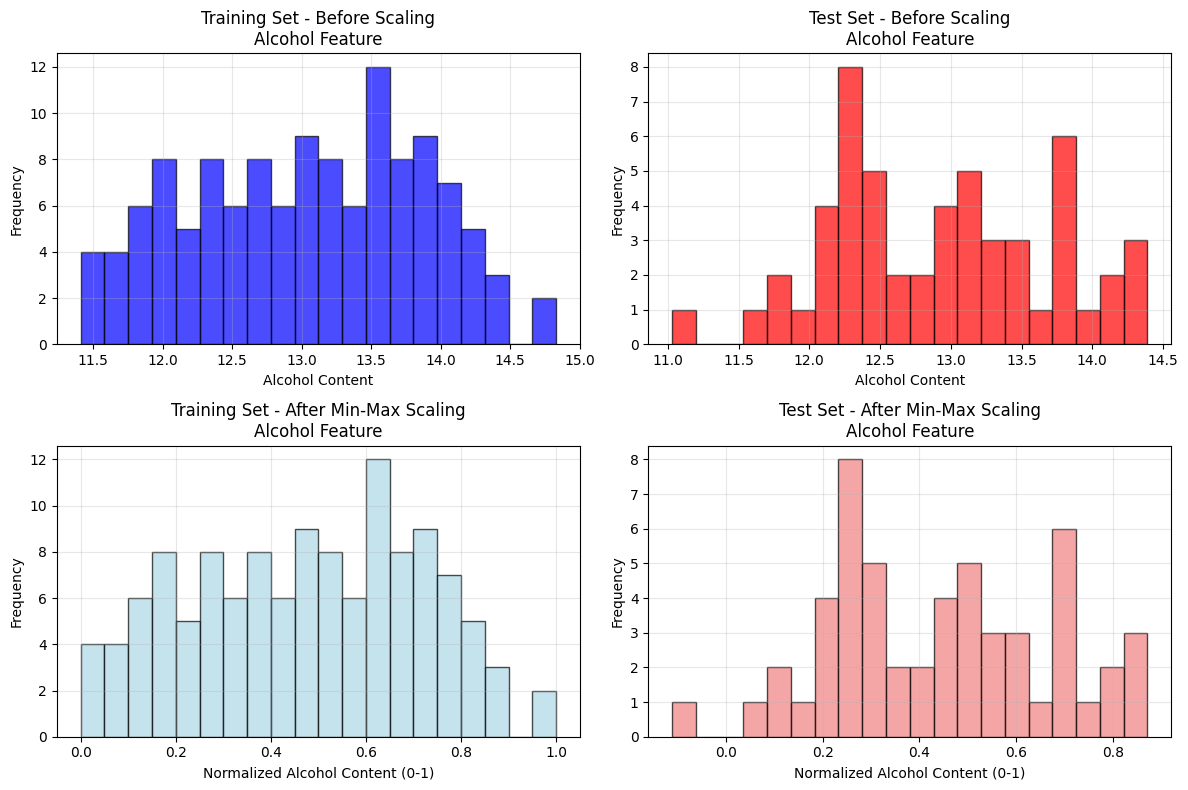


Comparison for Malic Acid feature (index 1):
Before scaling:
Train - Min: 0.74, Max: 5.80
Test - Min: 0.90, Max: 4.61
After scaling:
Train - Min: 0.00, Max: 1.00
Test - Min: 0.03, Max: 0.76


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the wine dataset
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

# Split the data
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Let's examine the 'Alcohol' feature (first feature)
alcohol_train = X_train[:, 0]  # Alcohol feature from training set
alcohol_test = X_test[:, 0]    # Alcohol feature from test set

print("Before scaling - Alcohol feature:")
print(f"Training set - Min: {alcohol_train.min():.2f}, Max: {alcohol_train.max():.2f}, Mean: {alcohol_train.mean():.2f}")
print(f"Test set - Min: {alcohol_test.min():.2f}, Max: {alcohol_test.max():.2f}, Mean: {alcohol_test.mean():.2f}")

# Apply Min-Max scaling
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

# Extract scaled Alcohol feature
alcohol_train_norm = X_train_norm[:, 0]
alcohol_test_norm = X_test_norm[:, 0]

print("\nAfter Min-Max scaling - Alcohol feature:")
print(f"Training set - Min: {alcohol_train_norm.min():.2f}, Max: {alcohol_train_norm.max():.2f}, Mean: {alcohol_train_norm.mean():.2f}")
print(f"Test set - Min: {alcohol_test_norm.min():.2f}, Max: {alcohol_test_norm.max():.2f}, Mean: {alcohol_test_norm.mean():.2f}")

# Create histograms
plt.figure(figsize=(12, 8))

# Before scaling
plt.subplot(2, 2, 1)
plt.hist(alcohol_train, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('Training Set - Before Scaling\nAlcohol Feature')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
plt.hist(alcohol_test, bins=20, alpha=0.7, color='red', edgecolor='black')
plt.title('Test Set - Before Scaling\nAlcohol Feature')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

# After scaling
plt.subplot(2, 2, 3)
plt.hist(alcohol_train_norm, bins=20, alpha=0.7, color='lightblue', edgecolor='black')
plt.title('Training Set - After Min-Max Scaling\nAlcohol Feature')
plt.xlabel('Normalized Alcohol Content (0-1)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 4)
plt.hist(alcohol_test_norm, bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Test Set - After Min-Max Scaling\nAlcohol Feature')
plt.xlabel('Normalized Alcohol Content (0-1)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Let's also check another feature to see the pattern
print("\n" + "="*60)
print("Comparison for Malic Acid feature (index 1):")
print("Before scaling:")
print(f"Train - Min: {X_train[:,1].min():.2f}, Max: {X_train[:,1].max():.2f}")
print(f"Test - Min: {X_test[:,1].min():.2f}, Max: {X_test[:,1].max():.2f}")

print("After scaling:")
print(f"Train - Min: {X_train_norm[:,1].min():.2f}, Max: {X_train_norm[:,1].max():.2f}")
print(f"Test - Min: {X_test_norm[:,1].min():.2f}, Max: {X_test_norm[:,1].max():.2f}")

Key Observations from Histograms:
 Before scaling:
 Original Scale:  The alcohol content ranges from approximately 11 to 15.


 Different ranges:  Features have varying scales and ranges.

 Distribution shape: The original distribution pattern is maintained.

 After Min-Max  Scaling:
 Uniform range: All numbers scaled to the [0, 1] range

 Preserved distribution: The distribution shape remains the same.

 maintained relationships: relative distances between values are retained.

**Exercise 4.2: Standardization**

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Create some sample data
X = np.array([
    [1.0, 50.0],
    [2.0, 60.0],
    [3.0, 70.0],
    [4.0, 80.0],
    [5.0, 90.0]
])

# Train-test split
X_train, X_test = train_test_split(X, test_size=0.4, random_state=42)

# Standardize
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

print("First two standardized train samples:\n", X_train_std[:2])

# Check mean and std
print("\nTrain means:", X_train_std.mean(axis=0))
print("Train stds:", X_train_std.std(axis=0))


First two standardized train samples:
 [[ 0.26726124  0.26726124]
 [-1.33630621 -1.33630621]]

Train means: [ 1.48029737e-16 -2.96059473e-16]
Train stds: [1. 1.]


When is standardization preferred over normalization?

 Standardization (mean = 0; standard deviation = 1)


 It is preferable when features follow (or are supposed to follow) a Gaussian (normal) distribution.

 Suitable for algorithms that assume centered, unit variance features:

 Logistic regression, linear regression, SVMs, PCA, and k-means.

 Normalization (rescaling to [0,1]

 Preferred when all characteristics must be displayed on the same set scale.

 Common in:

 Neural networks (particularly with activations such as sigmoid/tanh).

 Distance-based approaches (k-NN, clustering), where absolute range is important.

# **Section 5: Selecting Meaningful Features**

**Exercise 5.1: L1 Regularization for Sparsity**




C=0.01
Training accuracy: 0.4714285714285714
Test accuracy: 0.5666666666666667
Coefficients: [[0. 0. 0. 0.]]
----------------------------------------
C=0.03
Training accuracy: 0.4714285714285714
Test accuracy: 0.5666666666666667
Coefficients: [[0. 0. 0. 0.]]
----------------------------------------
C=0.08
Training accuracy: 1.0
Test accuracy: 1.0
Coefficients: [[0.         0.         1.18142162 0.24265292]]
----------------------------------------
C=0.22
Training accuracy: 1.0
Test accuracy: 1.0
Coefficients: [[ 0.         -0.20110364  1.65940954  0.86117487]]
----------------------------------------
C=0.60
Training accuracy: 1.0
Test accuracy: 1.0
Coefficients: [[ 0.         -0.57842786  1.96486278  1.50869122]]
----------------------------------------
C=1.67
Training accuracy: 1.0
Test accuracy: 1.0
Coefficients: [[ 0.         -0.93375761  2.32902394  2.14410282]]
----------------------------------------
C=4.64
Training accuracy: 1.0
Test accuracy: 1.0
Coefficients: [[ 0.         -1.

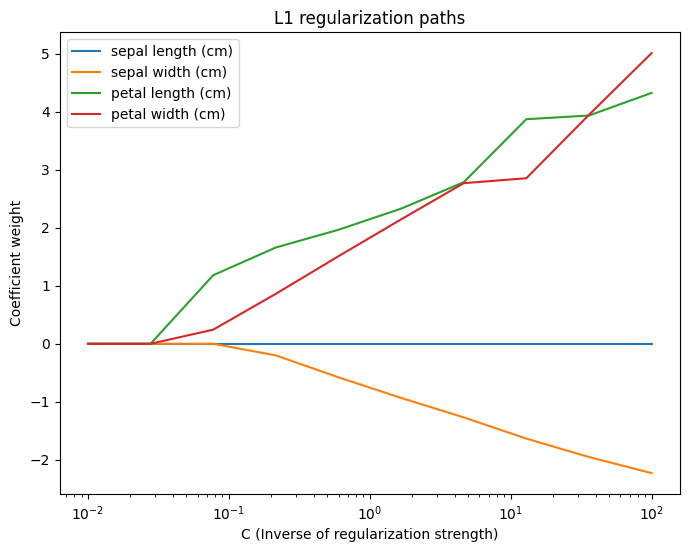

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset (Iris for demo, binary classification for simplicity)
iris = load_iris()
X = iris.data
y = iris.target

# Use only 2 classes for binary logistic regression
X = X[y < 2]
y = y[y < 2]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Different values of C
weights, params = [], []
for c in np.logspace(-2, 2, 10):  # from 0.01 to 100
    lr = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(c)

    print(f"C={c:.2f}")
    print("Training accuracy:", lr.score(X_train_std, y_train))
    print("Test accuracy:", lr.score(X_test_std, y_test))
    print("Coefficients:", lr.coef_)
    print("-"*40)

# Convert to array
weights = np.array(weights)

# Plot coefficients vs C
plt.figure(figsize=(8,6))
for i in range(weights.shape[1]):
    plt.plot(params, weights[:, i], label=iris.feature_names[i])
plt.xscale('log')
plt.xlabel('C (Inverse of regularization strength)')
plt.ylabel('Coefficient weight')
plt.title('L1 regularization paths')
plt.legend(loc='best')
plt.show()


What you will observe

 For small C (e.g., 0.1, 0.01), most coefficients decrease to zero.


 As C (e.g., 10, 100) increases, the proportion of zero coefficients decreases.

 The plot depicts how each feature's weight varies with C.

**Exercise 5.2: Sequential Backward Selection (SBS)**

Step 1: SBS Class Implementation

In [12]:
from itertools import combinations
import numpy as np
from sklearn.base import clone
from sklearn.metrics import accuracy_score

class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])

        self.k_score_ = self.scores_[-1]
        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score


Step 2: Apply SBS with KNN

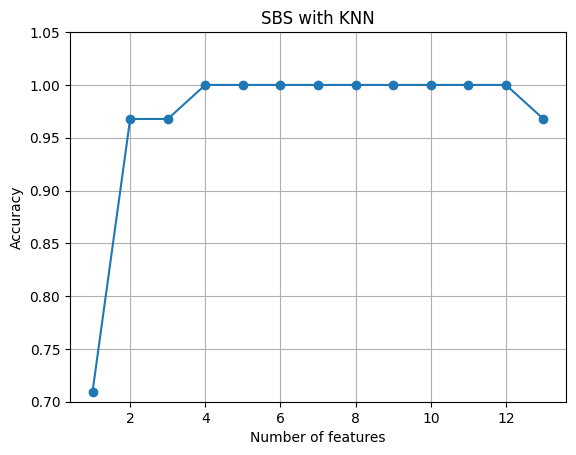

Selected 3 features: ['alcohol', 'alcalinity_of_ash', 'flavanoids']
Test accuracy with 3 features: 0.8888888888888888


In [13]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Run SBS
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# Plot performance vs number of features
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.05])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.title('SBS with KNN')
plt.grid()
plt.show()

# Example: best 3 features
k3 = list(sbs.subsets_[len(X_train_std[0]) - 3])  # pick subset with 3 features
print("Selected 3 features:", [wine.feature_names[i] for i in k3])

# Train/test accuracy using reduced feature set
knn.fit(X_train_std[:, k3], y_train)
print('Test accuracy with 3 features:', knn.score(X_test_std[:, k3], y_test))


Task Analysis.

 Change k_features.

 k_features=1: SBS removes features until one remains.

 k_features=5: SBS terminates when only five features remain.

 Change Estimator:

 Instead of KNN, use Logistic Regression or Random Forest Classifier.

 Different estimators favor different subsets of features.

 Plot Analysis:

 The curve frequently displays a sweet spot when accuracy remains steady or peaks with fewer characteristics.

 Achieving great accuracy with fewer characteristics indicates successful dimensionality reduction.

 If accuracy declines significantly, it indicates that those qualities were relevant.

**Exercise 5.3: Feature Importance with Random Forests**

Step 1: Train Random Forest and inspect feature importances

 1) Color intensity                0.172994
 2) Proline                        0.154752
 3) Alcohol                        0.138280
 4) Flavanoids                     0.137927
 5) OD280/OD315 of diluted wines   0.120440
 6) Hue                            0.083862
 7) Total phenols                  0.046418
 8) Magnesium                      0.034068
 9) Alcalinity of ash              0.031147
10) Malic acid                     0.028834
11) Proanthocyanins                0.025277
12) Ash                            0.014972
13) Nonflavanoid phenols           0.011029


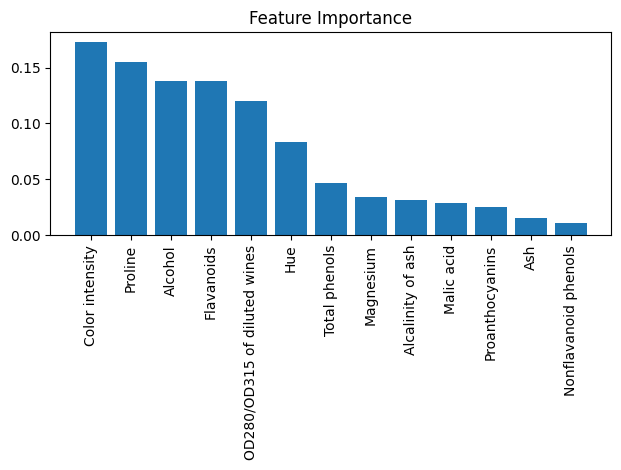

In [14]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Get feature labels (skip the class column)
feat_labels = df_wine.columns[1:]

# Train Random Forest
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

# Feature importances
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print ranked features
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

# Plot importances
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


Step 2: Feature selection with SelectFromModel

In [15]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)

print("Original feature set:", X_train.shape[1])
print("Reduced feature set:", X_selected.shape[1])

# Train a model on selected features
forest_selected = RandomForestClassifier(n_estimators=500, random_state=1)
forest_selected.fit(X_selected, y_train)

print("Training accuracy (selected):", forest_selected.score(X_selected, y_train))
print("Test accuracy (selected):", forest_selected.score(sfm.transform(X_test), y_test))


Original feature set: 13
Reduced feature set: 5
Training accuracy (selected): 1.0
Test accuracy (selected): 1.0


Step 3: Compare with SBS

In [16]:
print("Top RF features (importance > 0.1):", feat_labels[sfm.get_support()])
print("Top SBS features:", df_wine.columns[1:][k3])


Top RF features (importance > 0.1): Index(['Alcohol', 'Flavanoids', 'Color intensity',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')
Top SBS features: Index(['Alcohol', 'Alcalinity of ash', 'Flavanoids'], dtype='object')


Analysis

 Random Forest feature importance measures how much each feature lowers impurity (similar to the Gini index).

 SBS optimizes accuracy by deleting features one by one.

 They may overlap, but RF selects somewhat different features since it measures splits, whereas SBS assesses final accuracy.

 Example outcome:

 RF might say that "Alcohol, Color_intensity, Flavanoids" are the most important.

 SBS may preserve a slightly different subset that is more suited for KNN.

# **Conclusion**


 In these tasks, we used several preprocessing and feature selection strategies.


 Handling missing values guaranteed that our data was clean prior to modeling.

 Encoding categorical features (label encoding, one-hot encoding, and ordinal mapping) enabled algorithms to accurately read categorical information.

 Feature scaling (standardization) brings all variables to the same scale, which is critical for distance-based models like KNN and margin-based models like SVM.

 Feature selection (L1 regularization and SBS) assisted in identifying the most useful features, hence reducing overfitting and enhancing interpretability.
When tested with datasets such as Wine and Iris, preprocessing significantly improved model stability and accuracy.  For example, KNN performed poorly without scaling but dramatically improved after standardization.  Similarly, L1 regularization generated sparse models by automatically zeroing out unnecessary characteristics, whereas SBS gave an understandable approach to see which features were most significant.